In [119]:
#import libraries
import pandas as pd
import numpy as np

# Data Merging

In [120]:
#create a data set
data1={
    'id':[1,2,3,4,5,6,7],
    'age':[25,30,35,40,45,50,55],
    'name':['asif','babar','careem','david','eric','frank','george']
}

df=pd.DataFrame(data1)
df.head()


,id,age,name
0,1,25,asif
1,2,30,babar
2,3,35,careem
3,4,40,david
4,5,45,eric


In [121]:
# data2
data2={
    'id':[1,4,5,6,7,8,9],
    'city':['lahore','karachi','islamabad','multan','peshawar','karachi','lahore'],
    'occupation':['engineer','manager','doctor','teacher','engineer','doctor','manager']
}

data2=pd.DataFrame(data2)
data2.head()

,id,city,occupation
0,1,lahore,engineer
1,4,karachi,manager
2,5,islamabad,doctor
3,6,multan,teacher
4,7,peshawar,engineer


In [122]:
#merging data1 and data2 on id column
merged_data = pd.merge(df, data2, on='id', how='inner')
merged_data.head()

,id,age,name,city,occupation
0,1,25,asif,lahore,engineer
1,4,40,david,karachi,manager
2,5,45,eric,islamabad,doctor
3,6,50,frank,multan,teacher
4,7,55,george,peshawar,engineer


# Data Concatination

In [123]:
#data concatenation is merging data from multiple dataframes in single dataframe 

#create threee data frames
df1=pd.DataFrame({'name':['Asif','Babar','Careem','David'],'age':[25,30,35,40]})

df2=pd.DataFrame({'name':['eric','frank','george','harry'],'age':[22,33,35,40]})

#df3 is city and province of pakistan
df3=pd.DataFrame({'city':['lahore','karachi','islamabad','multan','peshawar'],
                  'province':['punjab','sindh','balochistan','punjab','kpk']})




In [124]:
df1

,name,age
0,Asif,25
1,Babar,30
2,Careem,35
3,David,40


In [125]:
df2

,name,age
0,eric,22
1,frank,33
2,george,35
3,harry,40


In [126]:
df3

,city,province
0,lahore,punjab
1,karachi,sindh
2,islamabad,balochistan
3,multan,punjab
4,peshawar,kpk


In [127]:
#now concatenated rows
concatinated_rows = pd.concat([df1,df2,df3])
concatinated_rows

,name,age,city,province
0,Asif,25.0,NaN,NaN
1,Babar,30.0,NaN,NaN
2,Careem,35.0,NaN,NaN
3,David,40.0,NaN,NaN
0,eric,22.0,NaN,NaN
1,frank,33.0,NaN,NaN
2,george,35.0,NaN,NaN
3,harry,40.0,NaN,NaN
0,NaN,NaN,lahore,punjab
1,NaN,NaN,karachi,sindh


In [128]:
#now concatenate columns
concatinated_columns = pd.concat([df1,df2, df3],axis=1)
concatinated_columns

,name,age,name,age,city,province
0,Asif,25.0,eric,22.0,lahore,punjab
1,Babar,30.0,frank,33.0,karachi,sindh
2,Careem,35.0,george,35.0,islamabad,balochistan
3,David,40.0,harry,40.0,multan,punjab
4,NaN,NaN,NaN,NaN,peshawar,kpk


# Transformation

In [129]:
#imp all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
# generate non normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df=pd.DataFrame(df , columns=['value'])
df.head()


,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [131]:
df.shape

(1000, 1)

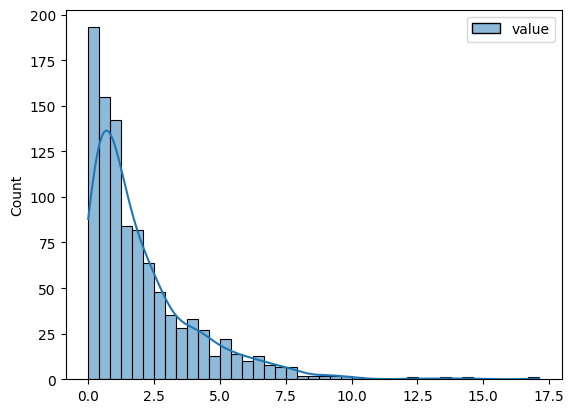

In [132]:
sns.histplot(df, kde=True)
plt.show()

In [133]:
from sklearn.preprocessing import PowerTransformer

In [134]:
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_jhonson = PowerTransformer(method='yeo-johnson')

# fit and transform and add new column of pt_yeo_jhonson, pt_boxcox in df

df['pt_boxcox'] = pt_boxcox.fit_transform(df[['value']]+1) 
df['pt_yeo_jhonson'] = pt_yeo_jhonson.fit_transform(df[['value']])


In [135]:
df.head()

,value,pt_boxcox,pt_yeo_jhonson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107


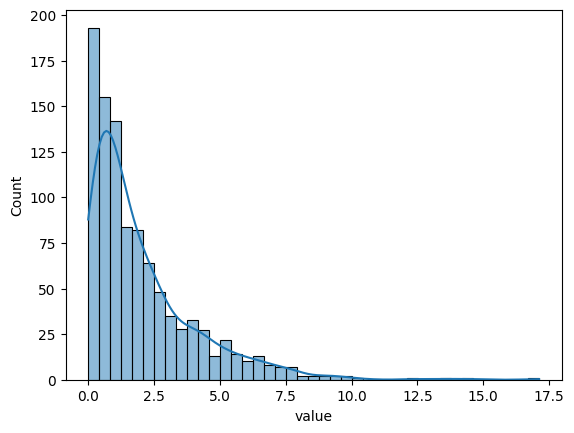

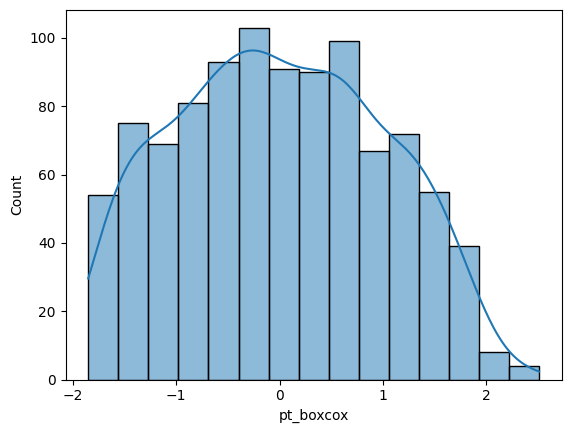

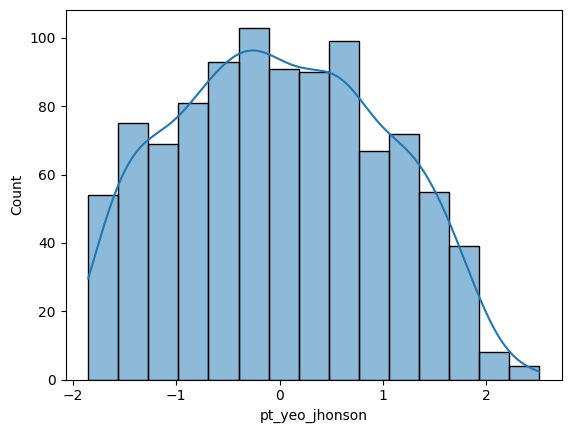

In [136]:
#create a histogram for all the columns in df and compare using sns.histplot 

for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show() 




# Normilization

In [137]:
from sklearn.preprocessing import Normalizer

#l2 normalization
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer( norm ='l2') # l2 is the default value of norm 
print(normalizer.fit_transform(data))
      

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [138]:
# now l1 normalization is which have unit length of 1 the sum of each row will be 1
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer( norm ='l1') # l1 is the default value of norm
print(normalizer.fit_transform(data))


[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [139]:
#create a data frame w
df= {
    'values':[1,5,10,20,50,100,200,500,1000, 2000, 5000, 10000]
}

df=pd.DataFrame(df)
df

,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: ylabel='Count'>

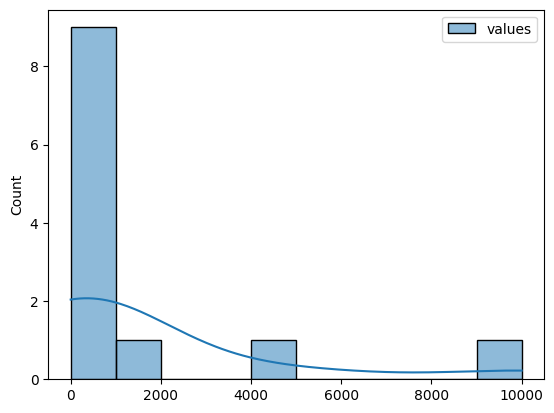

In [140]:
sns.histplot(df, kde=True)

In [141]:
#now converted the data into log
df['log_values']=np.log(df['values'])
df.head()

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023


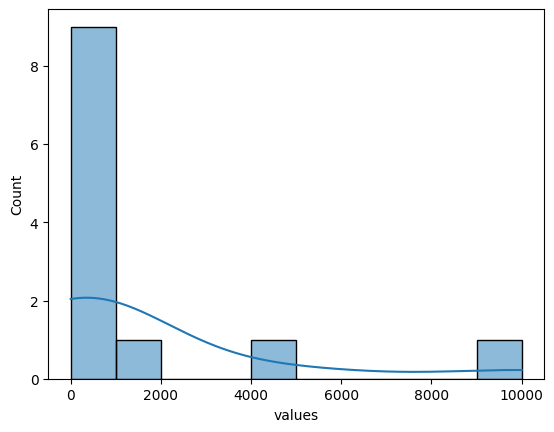

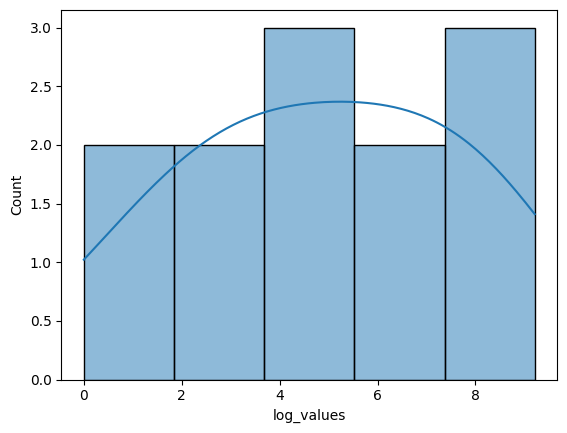

In [142]:
#now histogram of log values
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()